# Task 3 : Visualization using Histogram

### AIM: The aim of this project is to utilize histograms for visualizing and comprehending distribution patterns within the dataset to support effective analysis.

# An overview of the Datasets

In [30]:
# Importing the necessary libraries

# Importing pandas to use dataframes
# import pandas as pd

# Importing plotly express which will be used for creating the visualizations
#import plotly.express as px
#from plotly.offline import init_notebook_mode
# Doing this to make sure the graphs are visible in the kaggle kernels and not just a blank white screen
#init_notebook_mode()

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [32]:
# Reading all the datasets and creating dataframes
covid = pd.read_csv('../Desktop/covid_19_data.csv')
houses = pd.read_csv('../Desktop/train.csv')


In [33]:
covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [34]:
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Bar Charts

Similar to other charts, we use px.bar to create Bar Plots in Plotly. 

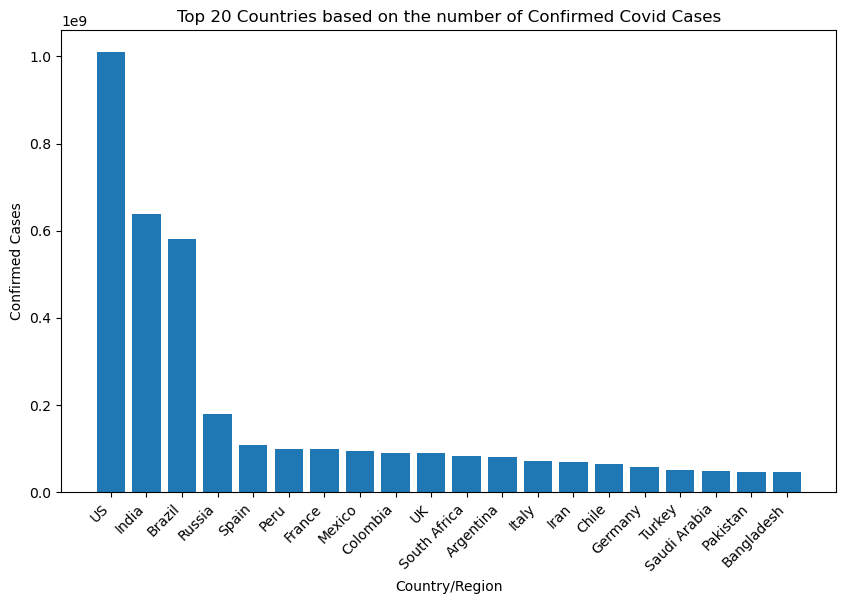

In [46]:
import matplotlib.pyplot as plt

# Sorting the dataset in descending order based on the number of Confirmed cases
covidCases = covidCases.sort_values(by='Confirmed', ascending=False)

# Selecting the top 20 Countries
top_20_countries = covidCases.iloc[:20]

# Creating a bar chart
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size as needed
bars = ax.bar(top_20_countries['Country/Region'], top_20_countries['Confirmed'])

# Rotating X-axis labels for better readability
ax.set_xticklabels(top_20_countries['Country/Region'], rotation=45, ha='right')

# Adding title and labels
ax.set_title('Top 20 Countries based on the number of Confirmed Covid Cases')
ax.set_xlabel('Country/Region')
ax.set_ylabel('Confirmed Cases')

# Displaying the plot
plt.show()


In [44]:
#calculating the sum of all Confirmed Cases in each Country/Region
covidCases = pd.DataFrame(covid.groupby('Country/Region')['Confirmed'].sum()).reset_index()
#sorting the dataset in descending order on the basis of number of Confirmed cases,i.e countries with the most Confirmed covid cases will be at the top
covidCases = covidCases.sort_values(by = 'Confirmed', ascending = False)

fig = px.bar(covidCases.iloc[:20], #plotting only the top 20 Countries
             x = 'Country/Region', y = 'Confirmed', title = 'Top 20 Countries based on number of Confirmed Covid Cases')
fig.show()

Sometimes, we would want to plot the bar chart in a horizontal orientation so that we can easily compare the values, let us do that now. 

In [36]:
fig = px.bar(covidCases.iloc[:20],  
             x = 'Confirmed', y = 'Country/Region', #notice how we've swapped the x and y values here in comparison to the Vertical Bar Chart
             orientation = 'h', #orientation - 'h' signifies horizontal orientation, thus the bar chart converts into a row chart
             #however, even if we omit the orientation parameter, we would still get the same bar chart as swapping what goes on the x-axis and what on the y-axis was sufficient in our case
             title = 'Top 20 Countries based on number of Confirmed Covid Cases')
fig.show()

#### We can see that highest number of covid cases are in USA followed by India and Brazil.

# Histograms

In [37]:
fig = px.histogram(houses,x = 'SalePrice',#the distribution of this column is plotted along the x-axis
                   title = 'Distribution of House Sale Price')
fig.show()

#### We can see that houses with price between 140K to 150K are sold more.

Now what if we want to see the distribution on the log scale? 

Simple. Just add one more parameter and we are all set.

In [38]:
fig = px.histogram(houses,x = 'SalePrice', title = 'Transforming the x-axis into log scale', 
                   log_x=True # the x-axis values are transformed into log scale, this can be seen in the range of values in the x-axis
                  )
fig.show()

After converting the above plot into log-scale, we see that it has a more or less normal distribution. 

One more common thing we like to do is change the bin size to see if we are able to get a better understanding of the data. Also, lets plot different histograms for houses sold in different years. 

It may sound like a lot, but is actually fairly simple, just tag along.

In [39]:
fig = px.histogram(houses,x = 'SalePrice', title = 'Distribution of House Price Across Years',
                   nbins=200, #this sets the number of bins to 200
                   color='YrSold' # each year would have a histogram plotted with different colours
                  )
fig.show()

#### Now we have a histogram with 200 bins with the distribution in each year of house sold represented in a different colour.

#### Maximum number of houses are sold in year 2010.

The use of histograms in this project successfully provided a visual and intuitive understanding of distribution patterns within the dataset, contributing to informed decision-making and analysis.